In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data
y = iris.target

/opt/miniconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


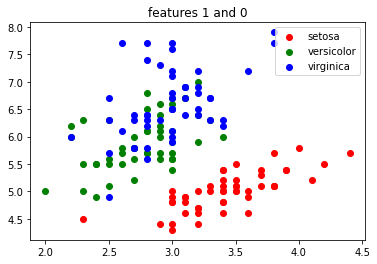

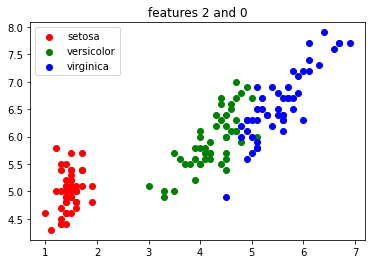

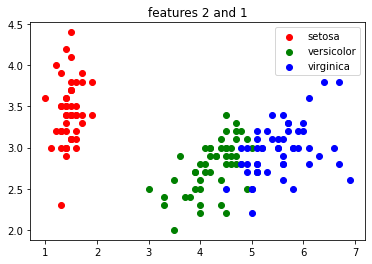

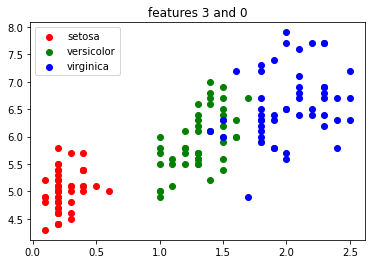

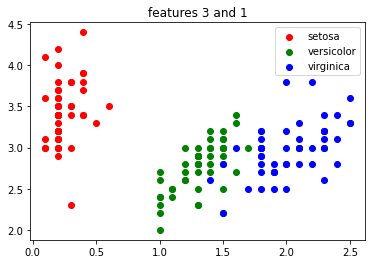

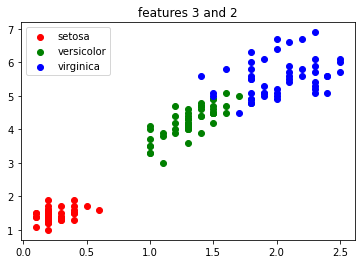

In [4]:
setosa = X[:50]
versicolor = X[50:100]
virginica = X[100:]
for f1 in range(4):
    for f2 in range(4):
        if f1 != f2 and f1 > f2:
            plt.scatter(setosa[:,f1], setosa[:,f2], color='red', label='setosa')
            plt.scatter(versicolor[:,f1], versicolor[:,f2], color='green', label='versicolor')
            plt.scatter(virginica[:,f1], virginica[:,f2], color='blue', label='virginica')
            plt.legend()
            plt.title(f"features {f1} and {f2}")
            plt.show()

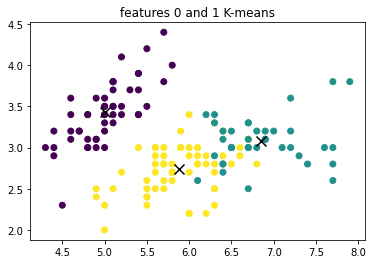

In [2]:
"""

K=some value
assign K random clusters
For each point, compute closest cluster
take the average of all the points in a cluster and assign that to be the new center
repeat
"""
K=3
import math
import random
import numpy as np
def ndim_distance(a,b):
    subtracted = []
    result = 0
    for i in range(len(a)):
        subtracted.append(a[i]-b[i])
    for i in subtracted:
        result += i*i
    result = math.sqrt(result)
    return result

def ndim_mean(points, dim):

    totalsum = [0,0,0,0]
    average = []
    for point in points:
        for i in range(len(point)):
            totalsum[i] += point[i]
    for i, item in enumerate(totalsum):
        average.append(totalsum[i]/len(points))
    return average

def show_centroids(centroids, f1, f2):
    centroids = np.array(centroids)
    plt.scatter(centroids[:, f1], centroids[:, f2], marker='x', s=100, c='black')
def run_kmeans(X,y, num_iters):
    centers = random.choices(X, k=K)
    for i in range(num_iters):
        closest_cluster_per_points = []
        best_distances_i = []
        for point in X:
            distances = [ndim_distance(point,center) for center in centers]
            best_distance_i = np.argmin(distances)
            best_distances_i.append(best_distance_i)
            closest_cluster_per_points.append(best_distance_i)
        points_by_cluster = [[] for i in range(K)]
        #print(points_by_cluster)
        for i in range(len(X)):
            points_by_cluster[closest_cluster_per_points[i]].append(X[i])
        for i in range(K):
            #print(points_by_cluster[i])
            centers[i] = ndim_mean(points_by_cluster[i], len(X[0]))
        #print(centers)
    return centers
def graph_kmeans(centers, X, f1, f2):
    best_distances_i = []
    for point in X:
        distances = [ndim_distance(point,center) for center in centers]
        best_distance_i = np.argmin(distances)
        best_distances_i.append(best_distance_i)
    plt.scatter(X[:,f1], X[:,f2],c=best_distances_i)
    show_centroids(centers, f1, f2)
    plt.title(f"features {f1} and {f2} K-means")
    plt.show()



centroids = run_kmeans(X, y, 100)
    
graph_kmeans(centroids, X, 0, 1)
    



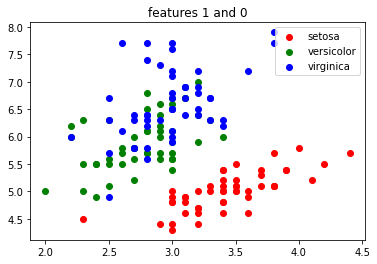

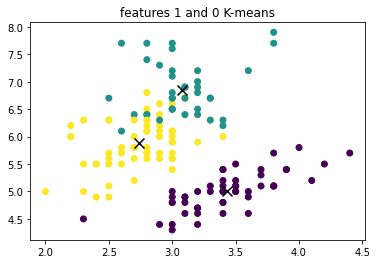

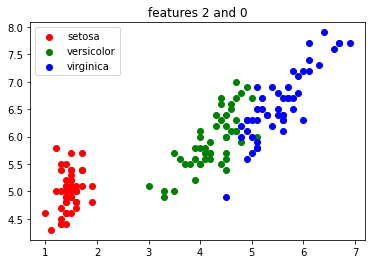

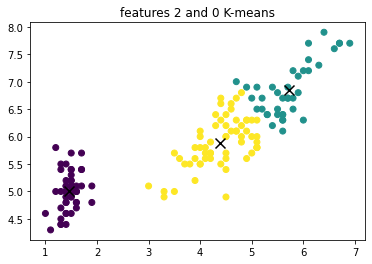

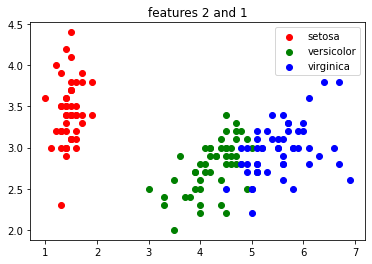

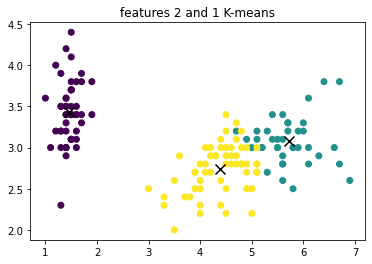

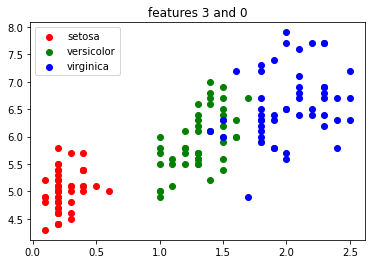

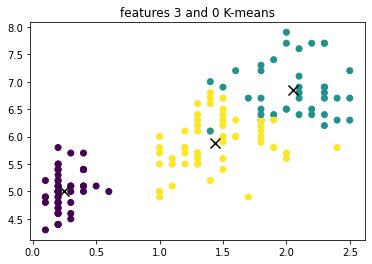

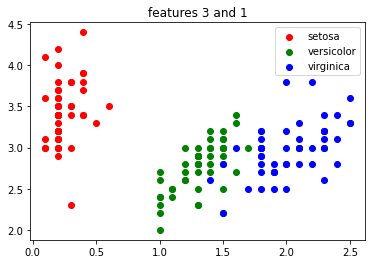

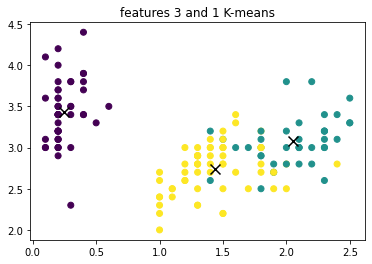

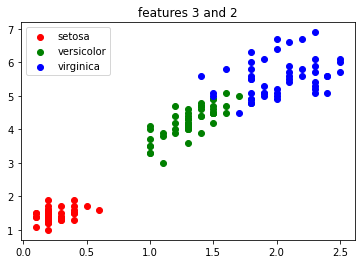

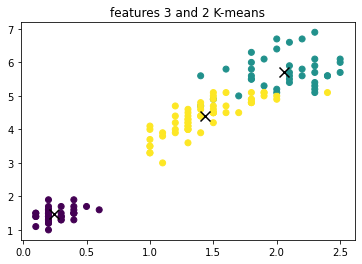

In [5]:

for f1 in range(4):
    for f2 in range(4):
        if f1 != f2 and f1 > f2:
            plt.scatter(setosa[:,f1], setosa[:,f2], color='red', label='setosa')
            plt.scatter(versicolor[:,f1], versicolor[:,f2], color='green', label='versicolor')
            plt.scatter(virginica[:,f1], virginica[:,f2], color='blue', label='virginica')
            plt.legend()
            plt.title(f"features {f1} and {f2}")
            plt.show()
            graph_kmeans(centroids, X, f1, f2)
            